In [1]:
# importing the neccesary libraries

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# reading in the data

df = pd.read_csv(r"C:\Users\Johan Larsson\Desktop\Individual Project\Audiobook\Data/audiobook_data_2.csv")

In [3]:
df.head(7)

,user_id,book_length_min_overall,book_length_min_avg,price_overall,price_avg,review,review10_10,completion,minutes_listened,support_request,last_visited_mins_purchase_date,target
0,994,1620.0,1620,19.73,19.73,yes,10.00,0.99,1603.8,5,92,no
1,1143,2160.0,2160,5.33,5.33,no,8.91,0.00,0.0,0,0,no
2,2059,2160.0,2160,5.33,5.33,no,8.91,0.00,0.0,0,388,no
3,2882,1620.0,1620,5.96,5.96,no,8.91,0.42,680.4,1,129,no
4,3342,2160.0,2160,5.33,5.33,no,8.91,0.22,475.2,0,361,no
5,3416,2160.0,2160,4.61,4.61,no,8.91,0.00,0.0,0,0,no
6,4949,2160.0,2160,5.33,5.33,no,8.91,0.04,86.4,0,366,no


In [4]:
df.shape

(14084, 12)

In [5]:
df.columns.values

array(['user_id', 'book_length_min_overall', 'book_length_min_avg',
       'price_overall', 'price_avg', 'review', 'review10_10',
       'completion', 'minutes_listened', 'support_request',
       'last_visited_mins_purchase_date', 'target'], dtype=object)

In [6]:
# checking if they are any NULL values

df.isna().sum()

user_id                            0
book_length_min_overall            0
book_length_min_avg                0
price_overall                      0
price_avg                          0
review                             0
review10_10                        0
completion                         0
minutes_listened                   0
support_request                    0
last_visited_mins_purchase_date    0
target                             0
dtype: int64

In [7]:
df.describe()

,user_id,book_length_min_overall,book_length_min_avg,price_overall,price_avg,review10_10,completion,minutes_listened,support_request,last_visited_mins_purchase_date
count,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000
mean,16772.491551,1591.281685,1678.608634,7.103791,7.543805,8.909795,0.125659,189.888983,0.070222,61.935033
std,9691.807248,504.340663,654.838599,4.931673,5.560129,0.643406,0.241206,371.084010,0.472157,88.207634
min,2.000000,216.000000,216.000000,3.860000,3.860000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,8368.000000,1188.000000,1188.000000,5.330000,5.330000,8.910000,0.000000,0.000000,0.000000,0.000000
50%,16711.500000,1620.000000,1620.000000,5.950000,6.070000,8.910000,0.000000,0.000000,0.000000,11.000000
75%,25187.250000,2160.000000,2160.000000,8.000000,8.000000,8.910000,0.130000,194.400000,0.000000,105.000000
max,33683.000000,2160.000000,7020.000000,130.940000,130.940000,10.000000,1.000000,2160.000000,30.000000,464.000000


In [8]:
#Counting the values in the column 'target'

df['target'].value_counts()

no     11847
yes     2237
Name: target, dtype: int64

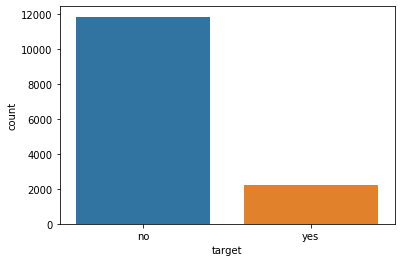

In [9]:
sns.countplot(df['target'])

In [10]:
# checking the precentage of the different values

not_bought_again = df[df.target == 'no']
bought_again =  df[df.target == 'yes']

num_not_bought_again = not_bought_again.shape[0]
num_bought_again = bought_again.shape[0]

print( num_not_bought_again / (num_not_bought_again + num_bought_again) * 100 , "% of customers bought again.")

print( num_bought_again / (num_bought_again + num_not_bought_again) * 100 , "% of customers did not buy again.")

84.11672820221528 % of customers bought again.
15.88327179778472 % of customers did not buy again.


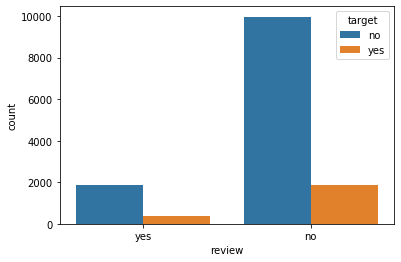

In [11]:
# barplot showing if the customers did a review next to if they bought again

sns.countplot (x='review', hue='target', data = df)

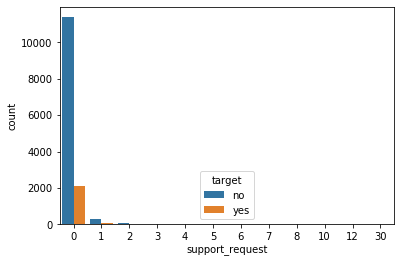

In [12]:
sns.countplot (x='support_request', hue='target', data = df)

In [13]:
# dropping the 'user_id' column

clean_df = df = df.drop('user_id', axis=1)

In [14]:
clean_df.shape

(14084, 11)

In [15]:
# transforming the values to numbers

for column in clean_df.columns:
    if clean_df[column].dtype == np.number:
        continue
    clean_df[column] = LabelEncoder().fit_transform(clean_df[column])

In [16]:
clean_df.dtypes

book_length_min_overall            float64
book_length_min_avg                  int64
price_overall                      float64
price_avg                          float64
review                               int32
review10_10                        float64
completion                         float64
minutes_listened                   float64
support_request                      int64
last_visited_mins_purchase_date      int64
target                               int32
dtype: object

In [17]:
clean_df.head()

,book_length_min_overall,book_length_min_avg,price_overall,price_avg,review,review10_10,completion,minutes_listened,support_request,last_visited_mins_purchase_date,target
0,1620.0,12,19.73,19.73,1,10.00,0.99,1603.8,5,92,0
1,2160.0,17,5.33,5.33,0,8.91,0.00,0.0,0,0,0
2,2160.0,17,5.33,5.33,0,8.91,0.00,0.0,0,369,0
3,1620.0,12,5.96,5.96,0,8.91,0.42,680.4,1,129,0
4,2160.0,17,5.33,5.33,0,8.91,0.22,475.2,0,356,0


In [18]:
# scale the clean dataframe

X = clean_df.drop('target', axis= 1)
y = clean_df['target']

#standardizing/scaling the feature

X = StandardScaler().fit_transform(X)

In [19]:
# spliting the data into 80% train and 20% test

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# time to create the model!

In [21]:
model = LogisticRegression()

# training the model

model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
predictions = model.predict(x_test)

print(predictions)

[0 0 0 ... 0 0 0]


In [23]:
print(classification_report (y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94      2388
           1       0.85      0.44      0.58       429

    accuracy                           0.90      2817
   macro avg       0.88      0.71      0.76      2817
weighted avg       0.90      0.90      0.89      2817

